# KIN 471 - Fitbit Sleep Analysis
## This is a script to visualize sleep data exported from your Fitbit. Unless otherwise requested, do not change the code within the code boxes.

### These are the libraries we are importing. They have special functions that have additional functionality beyond the built-in functions within Python. 
- pandas allows us to work with data
- matplotlib allows us to visualize our data (and save the figures as images!)
- seaborn allows us to visualize our data

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import matplotlib.axes as axes
%matplotlib inline
register_matplotlib_converters()
sns.set()

### This opens up the .csv we previously created and imports the data into a pandas dataframe.

In [70]:
name = input('Copy and paste the name of the .csv file that was created \(including .csv, ex. myfilename.csv):')
df = pd.read_csv(name)

Copy and paste the name of the .csv file that was created \(including .csv, ex. myfilename.csv): testymctestface.csv


### First 5 rows of your dataframe

In [71]:
df.head(5)

,dateOfSleep,minutesAsleep,timeInBed,deep,wake,light,rem
0,2018-12-26,467,519,115.0,52.0,283.0,69.0
1,2018-12-27,462,519,66.0,57.0,300.0,96.0
2,2018-12-28,495,562,98.0,67.0,299.0,98.0
3,2018-12-29,444,523,101.0,79.0,285.0,58.0
4,2018-12-30,463,543,118.0,80.0,278.0,67.0


### This turns the dateOfSleep column into our dataframe's index

In [72]:
df.index = df['dateOfSleep']
del df['dateOfSleep']

### See the difference?

In [73]:
df.head(5)

,minutesAsleep,timeInBed,deep,wake,light,rem
dateOfSleep,,,,,,
2018-12-26,467,519,115.0,52.0,283.0,69.0
2018-12-27,462,519,66.0,57.0,300.0,96.0
2018-12-28,495,562,98.0,67.0,299.0,98.0
2018-12-29,444,523,101.0,79.0,285.0,58.0
2018-12-30,463,543,118.0,80.0,278.0,67.0


### Plotting our data... but something looks off...
- Time is in minutes
- This looks really messy!

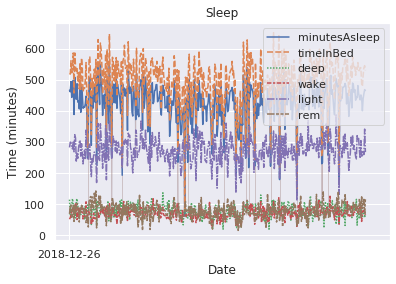

In [79]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df)))
my_xticks = g.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
g.set(xlabel='Date', 
      ylabel='Time (minutes)', 
      title='Sleep')
g.figure.savefig('sleepMinutes.png')

### To solve problem 2, we can specify a certain date we want to show our data from!

Choose a date, format YYYY-MM-DD 2020-01-01


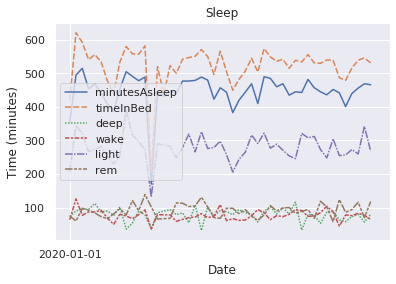

In [81]:
date = input('Choose a date, format YYYY-MM-DD')
dfRange = df[df.index >= date]
fig = sns.lineplot(data=dfRange)
fig.set_xticks(range(len(dfRange)))
my_xticks = fig.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
fig.set(xlabel='Date', 
      ylabel='Time (minutes)', 
      title='Sleep')
plt.savefig(date+'-min.png')

### To solve problem 2, we can just divide minutes by 60 - that gets us hours!

In [82]:
dfRangeHR = dfRange.div(60)

### Same code as before, but in hours!

Choose a date, format YYYY-MM-DD 2020-01-01


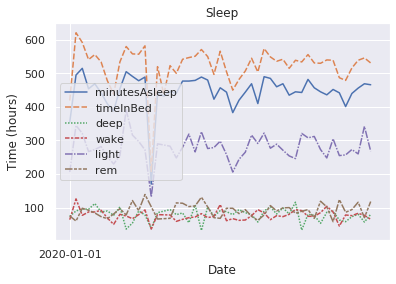

In [83]:
date = input('Choose a date, format YYYY-MM-DD')
dfRange = df[df.index >= date]
fig = sns.lineplot(data=dfRange)
fig.set_xticks(range(len(dfRange)))
my_xticks = fig.get_xticks()
plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
fig.set(xlabel='Date', 
      ylabel='Time (hours)', 
      title='Sleep')
plt.savefig(date+'-HR.png')